Saving 10. Market Basket Analysis.csv to 10. Market Basket Analysis.csv
Top 5 Association Rules:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
4,(pickled goods olives),(prepared meals),0.200,0.226,0.068,0.340000,1.504425,1.0,0.022800,1.172727,0.419118,0.189944,0.147287,0.320442
2,(cookies cakes),(oral hygiene),0.178,0.190,0.058,0.325843,1.714962,1.0,0.024180,1.201500,0.507173,0.187097,0.167707,0.315553
1,(oral hygiene),(cookies cakes),0.190,0.178,0.058,0.305263,1.714962,1.0,0.024180,1.183182,0.514687,0.187097,0.154821,0.315553
0,(packaged produce),(breakfast bars pastries),0.184,0.198,0.056,0.304348,1.537110,1.0,0.019568,1.152875,0.428221,0.171779,0.132603,0.293588
3,(prepared meals),(pickled goods olives),0.226,0.200,0.068,0.300885,1.504425,1.0,0.022800,1.144304,0.433197,0.189944,0.126106,0.320442


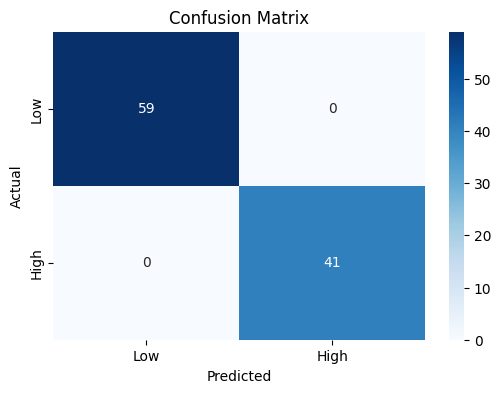

Accuracy: 1.00
Precision: 1.00
Recall: 1.00


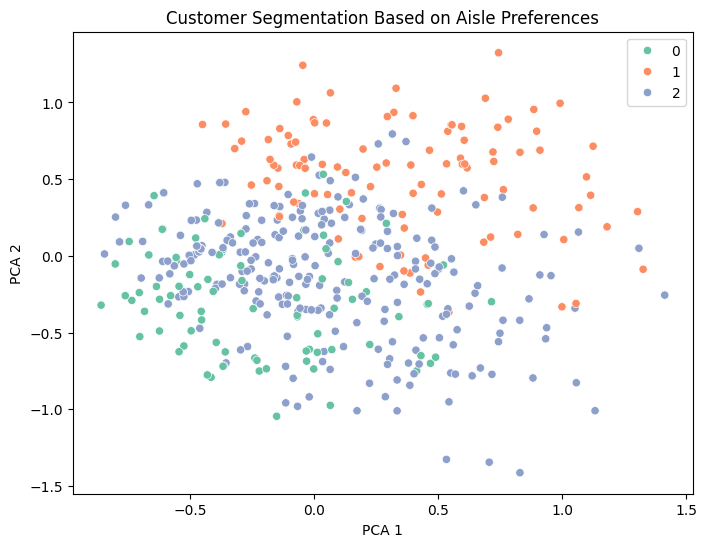

In [11]:
# 📦 STEP 1: Load and Simulate Transaction Data
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import files
uploaded = files.upload()  # Upload your "10. Market Basket Analysis.csv"

df_aisles = pd.read_csv("10. Market Basket Analysis.csv")
aisles = df_aisles['aisle'].sample(20, random_state=42).tolist()


transactions = []
customer_labels = []

np.random.seed(42)
for _ in range(500):
    num_items = np.random.randint(1, 8)
    items = random.sample(aisles, num_items)
    transactions.append(items)
    customer_labels.append(1 if num_items > 4 else 0)  # High spender if more than 4 items

# 🔍 STEP 2: Association Rule Mining (Apriori)
!pip install mlxtend
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df_trans = pd.DataFrame(te_array, columns=te.columns_)

frequent_itemsets = apriori(df_trans, min_support=0.05, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)

print("Top 5 Association Rules:")
display(rules.sort_values(by='confidence', ascending=False).head())

# 🤖 STEP 3: Classification (High vs. Low Spender)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

X = np.array([len(t) for t in transactions]).reshape(-1, 1)
y = np.array(customer_labels)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Low", "High"], yticklabels=["Low", "High"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print(f"Accuracy: {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall: {rec:.2f}")

# 🧩 STEP 4: Clustering and Customer Segmentation
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

item_df = pd.DataFrame(te_array.astype(int), columns=te.columns_)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(item_df)

reduced = PCA(n_components=2).fit_transform(item_df)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=reduced[:, 0], y=reduced[:, 1], hue=clusters, palette="Set2")
plt.title("Customer Segmentation Based on Aisle Preferences")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


